In [102]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [103]:
theta = 20
n = 100

sample = np.random.uniform(theta, theta*2, n)

# доверительный интервал ОММ

In [104]:
first_moment = np.mean(sample)
second_moment = np.mean(sample**2)
theta_est = first_moment*2/3
sigma = (4/9*(second_moment - first_moment**2))**0.5
omm_b = -1*(-1.96/ n**0.5  * sigma - theta_est)
omm_a = -1*(1.96/ n**0.5  * sigma - theta_est)
print(f'theta between {np.round(omm_a, 4)} and {np.round(omm_b, 4)} with 95% probability, real val is {theta}')

theta between 19.9735 and 21.4796 with 95% probability, real val is 20


# точный доверительный интервал 

In [105]:
pr_b = np.max(sample)/2/0.971
pr_a = np.max(sample)/2/0.99987
print(f'theta between {np.round(pr_a, 4)} and {np.round(pr_b, 4)} with 95% probability, real val is {theta}')

theta between 19.935 and 20.5277 with 95% probability, real val is 20


# бутстрап

In [106]:
theta_est = first_moment*2/3
N = 100

size = len(sample)

sample_bs = sample.copy()
sample_bs = np.repeat(sample_bs, 20)

deltas = []
for i in range(N):
    random.shuffle(sample_bs)
    deltas.append(np.mean(sample_bs[:size])*2/3 - theta_est)

In [107]:
deltas.sort()
delta_025 = deltas[int(0.025*len(deltas))]
delta_975 = deltas[int(0.975*len(deltas))]

bs_b = -1*(delta_025-theta_est)
bs_a = -1*(delta_975-theta_est)

print(f'theta between {np.round(bs_a, 4)} and {np.round(bs_b, 4)} with 95% probability, real val is {theta}')

theta between 19.9099 and 21.683 with 95% probability, real val is 20


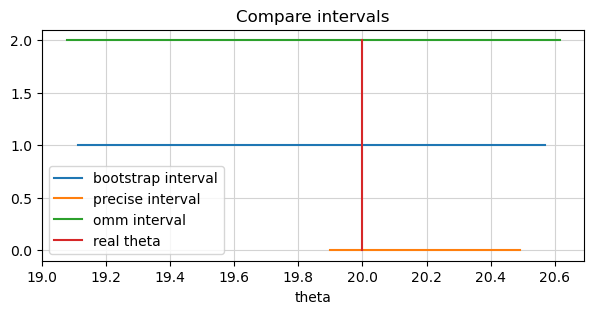

In [135]:
fig, ax = plt.subplots(figsize=(7,3))

ax.plot([bs_a, bs_b], [1,1], label = 'bootstrap interval')
ax.plot([pr_a, pr_b], [0,0], label = 'precise interval')
ax.plot([omm_a, omm_b], [2,2], label = 'omm interval')
ax.plot([theta, theta], [0, 2], label = 'real theta')

ax.grid(color = 'lightgray')
ax.set_title('Compare intervals')    

ax.set_xlabel('theta')

ax.legend(loc = 'best')